In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_engineered_stock.csv', index_col='Date')

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Close,Daily Return,MA_50,MA_200,Volatility,RSI
Date,,,,,,
2021-04-19,4163.259766,-0.005307,3956.317007,3610.203705,0.006847,81.494024
2021-04-20,4134.939941,-0.006802,3961.279204,3615.228354,0.007125,77.486287
2021-04-21,4173.419922,0.009306,3966.435801,3620.196854,0.006867,79.061562
2021-04-22,4134.979980,-0.009211,3970.910801,3625.145154,0.007163,67.105580
2021-04-23,4180.169922,0.010929,3976.316602,3630.196304,0.007363,65.799450


In [5]:
X = df.drop('Close', axis=1).values
y = df['Close'].values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [8]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='mse')

In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 2s 29ms/step - loss: 0.1600 - val_loss: 0.0217
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0653 - val_loss: 0.0106
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0588 - val_loss: 0.0096
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0556 - val_loss: 0.0091
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0094
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0552 - val_loss: 0.0091
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0523 - val_loss: 0.0089
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.0089
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.0110
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0536 - val_loss: 0.0091
Epoch 11

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [13]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

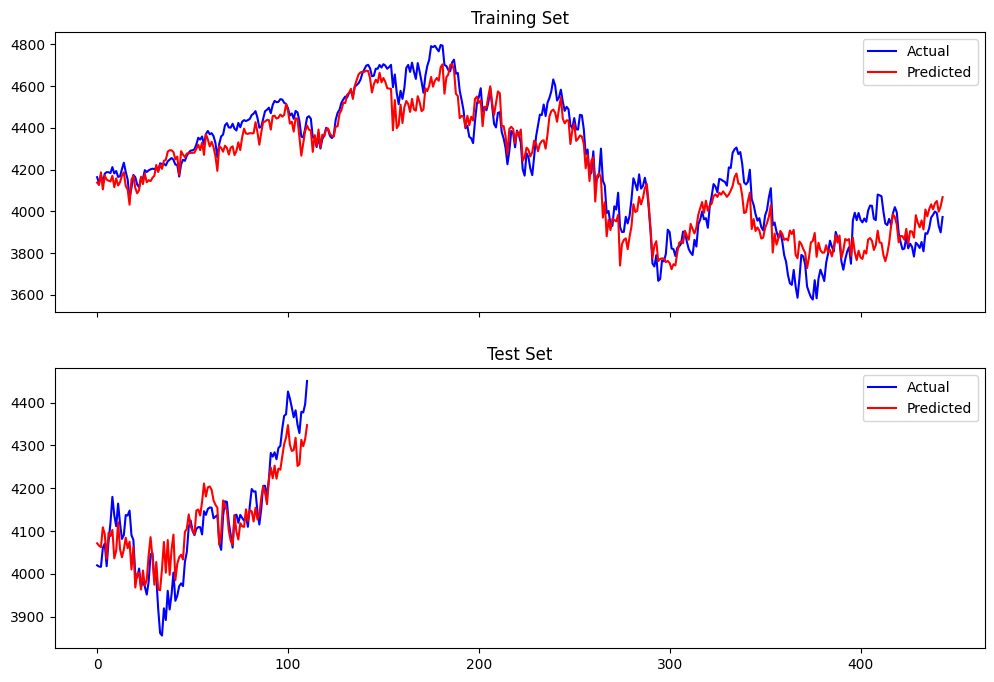

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

ax1.set_title('Training Set')
ax1.plot(y_train.flatten(), color='blue', label='Actual')
ax1.plot(train_predict.flatten(), color='red', label='Predicted')
ax1.legend()

ax2.set_title('Test Set')
ax2.plot(y_test.flatten(), color='blue', label='Actual'), 
ax2.plot(test_predict.flatten(), color='red', label='Predicted'),
ax2.legend()